# Water Temperature vs Salinity project.

Import Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import re

Load CSV, taken from Kaggle.com (n.b this is a large CSV file with 864,863 rows)

In [42]:
data = pd.read_csv('bottle.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
print(data.shape)

(864863, 74)


In [44]:
def get_columns(data):
    columns = []
    for column in data.columns:
        columns.append(column)
    for i in columns:
        re.sub(r'[^A-Za-z0-9]+', ' ', i)
    return columns
        
        

Trim dataframe to the two columns of interest and translate them into multi-dimensional arrays.

In [45]:
df = data[['Salnty', 'T_degC']]
df.dropna(inplace = True)
y = np.array(df['T_degC'])
X = np.array(df['Salnty'])
X = X.reshape(-1, 1)

#Divide the data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Instantiate the LinearRegression model, fit and predict.

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = np.array(model.predict(X_test))
r2 = r2_score(y_test, predictions)
print('The co-efficient of determination of this data is: ' + str(r2))



The co-efficient of determination of this data is: 0.25355215490785077


List of possible matplotlib styles for the visualisation of the data

In [47]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


Plot the data and show line of best fit derived from the predictive model

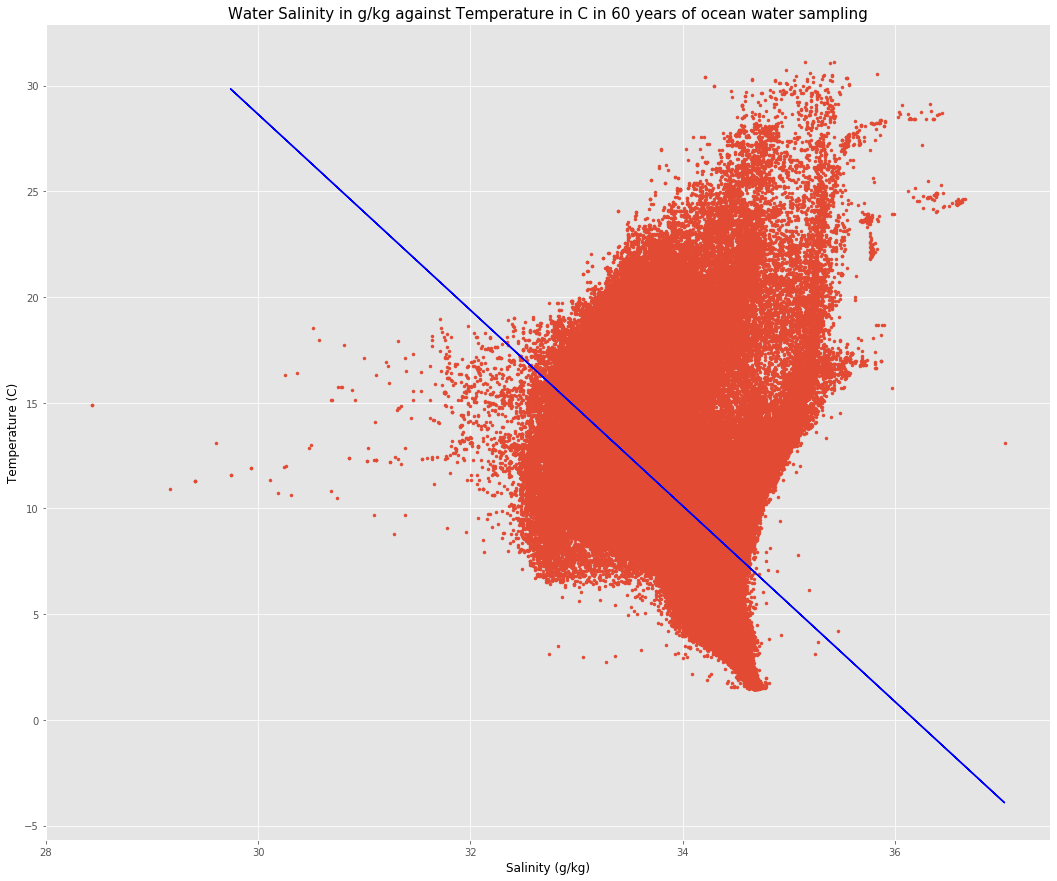

In [48]:
plt.figure(figsize = (18,15))
plt.style.use('ggplot')
plt.scatter(X, y, marker = '.')
plt.plot(X_test, predictions, color = 'Blue')
plt.ylabel('Temperature (C)', color = 'Black', size = 12)
plt.xlabel('Salinity (g/kg)', color = 'Black', size = 12)
plt.title('Water Salinity in g/kg against Temperature in C in 60 years of ocean water sampling', color = 'Black', size = 15)
plt.show()

Comment, the data indicates an inverse relationship, showing that a general increase in salinity is
correspondant to a decrease of temperature. While this data does show a trend, a low co-efficient of determination indicates salinity as a poor metric for predicting water temperature for the whole ocean. 

It is more appropriate to divide the data by the station id and plot the relevant data accordingly, and at some stations there is a strong inverse linear relationship between salinity and temperature. Suggesting that location is a factor when considering water salinity.

In [49]:
#list of unique stations
stations = pd.unique(data["Sta_ID"])
def get_stations(stations):
    for i in stations:
        station_split = data[data.Sta_ID == i]
        station_split = station_split[['Salnty', 'T_degC']]
        station_split.dropna(inplace = True)
        y = np.array(df['T_degC'])
        X = np.array(df['Salnty'])
        X = X.reshape(-1, 1)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)
        model = LinearRegression()
        model.fit(X_train, y_train)
        predictions = np.array(model.predict(X_test))
        indivdual_r2 = r2_score(y_test, predictions)
        for value in indivdual_r2:
            if value >= 0.85:
                plt.figure(figsize = (15,8))
                plt.style.use('ggplot')
                plt.scatter(X, y, marker = '.')
                plt.plot(X_test, predictions, color = 'Blue')
                plt.ylabel('Temperature (C)', color = 'Black', size = 12)
                plt.xlabel('Salinity (g/kg)', color = 'Black', size = 12)
                plt.title('(Station number: ' + station_id + ') ' + 'Water Salinity in g/kg against Temperature in C in 60 years of ocean water sampling', color = 'Black', size = 15)
                plt.show()
                
                

        
        

In [50]:
for station in stations:
    print(station)

054.0 056.0
052.0 075.0
051.0 085.0
050.0 095.0
050.0 104.0
049.0 114.0
056.7 146.0
056.7 136.0
058.0 127.0
059.0 117.0
059.0 107.0
060.0 097.0
061.0 087.0
061.0 078.0
062.0 068.0
063.3 058.0
072.0 056.0
071.0 066.0
071.0 076.0
081.0 117.0
081.0 127.0
081.0 107.0
081.0 097.0
082.0 097.0
082.0 087.0
082.0 077.0
082.0 067.0
092.0 039.0
092.0 048.0
092.0 058.0
092.0 068.0
092.0 078.0
092.0 088.0
092.0 098.0
092.0 108.0
092.0 117.0
092.0 127.0
092.0 137.0
103.3 128.0
103.3 119.0
103.3 111.0
102.0 103.0
102.0 094.0
102.0 084.0
102.0 074.0
102.0 064.0
102.0 054.0
101.0 044.0
101.0 034.0
111.0 038.0
111.0 048.0
111.0 058.0
111.0 068.0
112.0 078.0
112.0 088.0
112.0 098.0
112.0 107.0
112.0 117.0
113.3 127.0
113.3 137.0
126.0 132.0
126.0 122.0
125.0 112.0
125.0 102.0
124.0 093.0
124.0 083.0
123.3 073.0
123.3 063.0
122.0 053.0
122.0 044.0
044.0 048.5
042.0 068.0
041.0 077.0
039.0 096.0
036.7 115.0
036.0 125.0
024.0 120.0
025.0 111.0
026.0 102.0
028.0 092.0
029.0 083.0
030.0 074.0
031.0 065.0
033.

087.0 062.0
087.0 063.0
087.0 064.0
087.0 065.5
087.0 066.7
086.7 068.0
086.5 070.0
086.5 071.5
086.0 072.7
086.0 074.0
087.0 075.0
087.5 073.7
087.7 072.5
087.7 071.0
088.0 070.0
088.0 069.0
088.0 067.7
088.0 066.5
088.0 065.0
088.5 064.0
088.5 062.7
088.5 061.7
088.5 061.5
088.7 060.5
088.7 059.0
089.0 058.0
089.0 057.0
089.0 055.7
089.0 054.5
089.0 053.0
090.5 054.0
090.0 056.5
090.0 059.0
090.0 061.0
089.7 064.0
089.5 066.0
089.0 068.5
089.0 071.0
089.0 073.0
088.7 075.7
088.5 078.0
088.0 080.5
088.0 083.0
089.7 077.0
090.0 075.7
090.0 074.5
090.0 073.0
090.0 072.0
090.5 068.7
090.7 067.5
090.7 066.0
091.0 065.0
091.0 064.0
089.0 064.0
091.0 062.7
090.0 062.7
091.0 063.0
091.0 061.5
091.0 060.0
093.3 059.0
091.5 059.0
094.0 057.7
091.5 058.0
091.7 056.5
095.0 056.5
091.7 055.0
092.0 054.0
092.0 053.0
092.0 051.7
092.0 050.5
092.0 049.0
092.5 048.0
092.5 047.0
092.7 046.0
093.0 047.0
093.0 048.0
093.0 048.5
093.3 049.5
093.7 050.0
094.0 051.5
094.0 052.5
094.0 053.5
094.5 054.7
094.

Replace the station id with a string containing the id from the list of ids above. On running the cell it will generate a regression analysis for the data from that station. Project for the future, run a for loop to itererate through all the stations and plot the regression model for each station.

In [52]:
station_id = '080.0 147.0'

station1 = data[data.Sta_ID == station_id]

df = station1[['Salnty', 'T_degC']]
df.dropna(inplace = True)
y = np.array(df['T_degC'])
X = np.array(df['Salnty'])
X = X.reshape(-1, 1)

#Divide the data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = np.array(model.predict(X_test))
indivdual_r2 = round((r2_score(y_test, predictions)
),2)print('The co-efficient of determination of this data is: ' + str(indivdual_r2))


The co-efficient of determination of this data is: 0.7008620171666501


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


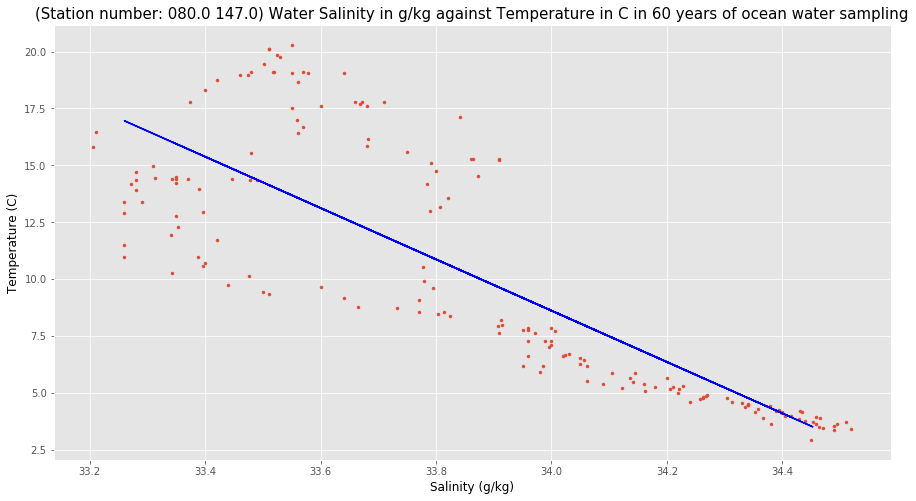

In [53]:
plt.figure(figsize = (15,8))
plt.style.use('ggplot')
plt.scatter(X, y, marker = '.')
plt.plot(X_test, predictions, color = 'Blue')
plt.ylabel('Temperature (C)', color = 'Black', size = 12)
plt.xlabel('Salinity (g/kg)', color = 'Black', size = 12)
plt.title('(Station number: ' + station_id + ') ' + 'Water Salinity in g/kg against Temperature in C in 60 years of ocean water sampling', color = 'Black', size = 15)
plt.show()

In [74]:
value = 33
predict_temp =  np.array(model.predict([[value]]))
print("At station " + str(station_id) + ", the g/kg concentration of " + str(value) + " the predicted temperature to an accuracy of " + str((round(indivdual_r2, 3))*100)  + "%, is " + str(predict_temp))

At station 080.0 147.0, the g/kg concentration of 33 the predicted temperature to an accuracy of 70.1%, is [19.88997103]
